## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 


## Read in cleaned data

In [2]:
df_subreddits = pd.read_csv('/Users/annarutledge/Documents/general_assembly/submissions22/projects/project-3-master/data/subreddits.csv')

In [3]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [4]:
X = df_subreddits[['full_text', 'letter_count', 'word_count']]

y = df_subreddits['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [6]:
X_train.shape

(14548, 3)

In [7]:
X_test.shape

(4850, 3)

In [8]:
y_train.shape

(14548,)

In [9]:
y_test.shape

(4850,)

## Bagging classifier model

In [10]:
cv = CountVectorizer()

In [11]:
text_vectorizer = make_column_transformer((cv, 'full_text'), remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)

In [12]:
bc = BaggingClassifier()

In [13]:
pipe = make_pipeline(text_vectorizer, bc)

In [14]:
params = {
    'baggingclassifier__n_estimators':[10, 20], 
    'baggingclassifier__max_samples':[0.9, 1.0],
    'columntransformer__countvectorizer__ngram_range':[(1,2), (1,3)], 
    'columntransformer__countvectorizer__max_df':[0.8, 0.9, 1],
    'columntransformer__countvectorizer__min_df':[0, 0.1, 0.2],
    'columntransformer__countvectorizer__stop_words':[None, 'english']
}

In [15]:
rs = RandomizedSearchCV(pipe, params, n_jobs=-1)

In [16]:
rs.fit(X_train, y_train)

/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, f

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('countvectorizer',
                                                                               CountVectorizer(),
                                                                               'full_text')],
                                                                verbose_feature_names_out=False)),
                                             ('baggingclassifier',
                                              BaggingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'baggingclassifier__max_samples': [0.9,
                                                                           1.0],
                                        'baggingclas

In [17]:
rs.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(max_df=0.8,
                                                                  min_df=0,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'full_text')],
                                   verbose_feature_names_out=False)),
                ('baggingclassifier', BaggingClassifier(n_estimators=20))])

In [18]:
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__countvectorizer__stop_words,param_columntransformer__countvectorizer__ngram_range,param_columntransformer__countvectorizer__min_df,param_columntransformer__countvectorizer__max_df,param_baggingclassifier__n_estimators,param_baggingclassifier__max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,142.477698,2.690952,0.319659,0.013368,english,"(1, 2)",0,0.8,20,1.0,{'columntransformer__countvectorizer__stop_wor...,0.745017,0.746392,0.755326,0.741148,0.738398,0.745256,0.005774,1
1,1.301899,0.135015,0.000000,0.000000,None,"(1, 3)",0.1,1,20,0.9,{'columntransformer__countvectorizer__stop_wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,128.510024,5.831908,0.299328,0.021499,english,"(1, 2)",0,0.9,20,0.9,{'columntransformer__countvectorizer__stop_wor...,0.735395,0.745704,0.748110,0.742523,0.731179,0.740582,0.006356,2
3,0.715612,0.058651,0.000000,0.000000,english,"(1, 2)",0.2,0.8,20,1.0,{'columntransformer__countvectorizer__stop_wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,0.887395,0.067075,0.000000,0.000000,english,"(1, 3)",0.1,1,10,0.9,{'columntransformer__countvectorizer__stop_wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.915379,0.054656,0.000000,0.000000,None,"(1, 2)",0.2,1,10,1.0,{'columntransformer__countvectorizer__stop_wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
6,1.182368,0.032472,0.000000,0.000000,english,"(1, 3)",0.2,0.9,10,1.0,{'columntransformer__countvectorizer__stop_wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,1.128438,0.077341,0.151308,0.019718,english,"(1, 2)",0.1,0.9,20,0.9,{'columntransformer__countvectorizer__stop_wor...,0.629210,0.627835,0.639863,0.639395,0.624613,0.632183,0.006262,5
8,4.992909,0.068918,0.258202,0.011637,None,"(1, 3)",0.1,0.8,10,0.9,{'columntransformer__countvectorizer__stop_wor...,0.739519,0.721993,0.731615,0.715366,0.723616,0.726422,0.008345,3
9,114.199104,1.649673,0.249892,0.036337,None,"(1, 2)",0,1,20,0.9,{'columntransformer__countvectorizer__stop_wor...,0.661168,0.651890,0.673196,0.652802,0.657614,0.659334,0.007701,4


In [19]:
y_preds = rs.predict(X_test)

In [20]:
y_preds

array(['showerthoughts', 'crazyideas', 'crazyideas', ...,
       'showerthoughts', 'showerthoughts', 'showerthoughts'], dtype=object)

### Accuracy score

In [21]:
rs.score(X_test, y_test)

0.7408247422680413

In [22]:
accuracy_score(y_test, y_preds)

0.7408247422680413

### Recall/sensitivity score

In [23]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.7228964401294499

### Precision score

In [24]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.7575243747350572

### F1 Score

In [25]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.7398054233078037

### Confusion Matrix

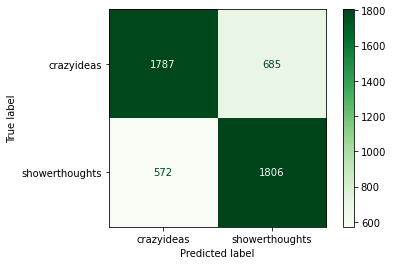

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens')